# Q-learning

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

def utility_func(t, W, alpha=0.1):
  if t == 10:
    reward = -np.exp(-alpha*W)/alpha
  else:
    reward = 0
  return reward

# Function to find the maximum Q-value or action
def find_max_qvalue(qvalue_dict, state, status):
    max_value = -np.inf
    max_action = []
    for act in action_space:
      q_value = qvalue_dict.get((state, act),-np.inf) # Default value for missing keys
      if q_value > max_value:
        max_value = q_value
        max_action = [act]
    if status == "value":
      return max_value
    elif status == "action":
      return max_action[0]
    
# Optimal policy
def optimal_policy(state):
  return find_max_qvalue(Q, state, "action")

In [ ]:
# Problem parameters
risky_return = {"high": (0.2, -0.1, 0.6), 
                "equal": (0.15, -0.1, 0.6),
                "low": (0.1, -0.1, 0.6)}
T = 10  # Time horizon
alpha = 0.1 # Utility Parameter
r = 0.05 # Risk-free rate
gamma = 0.9  # Discounted factor
step_size = 0.01  # Learning rate
epsilon = 0.4  # Exploration rate
max_episodes = 1000000  # Maximum number of episodes
W0 = 1 # initial wealth
value_function_changes_list = defaultdict(list)
state_space = [(t, round(W, 1)) for t in range(T + 1) for W in np.arange(-50, 50, 0.1)] # states of time and wealth
action_space = [0.2,0.4,0.6,0.8,"optimal_action"] # fraction of wealth allocate to risky asset

# Initialize Q-function: Assume all initial value = -np.exp(-alpha*W0)/alpha
Q = {}
initial_value = -np.exp(-alpha*W0)/alpha
for state in state_space:
  for action in action_space:
    Q[(state, action)] = initial_value

# Q Learning
for para in risky_return.keys():
  a, b, p = risky_return.get(para)
  window_size = 1000 # Check convergence over the last 1000 episodes
  convergence_threshold = 1e-5
  for episode in range(max_episodes):
    W = 1.0  # Initial wealth
    state = (0, W)
    max_value_change = 0
    for t in range(T+1):
      # Choose action
      if random.uniform(0, 1) < epsilon:
        action = random.choice(action_space)  # Explore
      else:
        action = find_max_qvalue(Q, state, "action")  # Exploit

      if action == "optimal_action":
        assert t<=10
        allocation = 1/(alpha*(a-b)*(1+r)**(T-t-1))*np.log(p*(a-r)/((1-p)*(r-b)))
      else:
        action = round(np.clip(action,-20,20),1)
        allocation = action*W


      if t < 10:
        # Observe return of the risky asset     
        Y = a if random.uniform(0, 1) < p else b
        # Calculate next wealth
        W_next = round(np.clip(allocation * (Y - r) + W * (1 + r), -50, 50), 1)
        next_state = (t + 1, W_next)
        # Update Q-function
        reward = utility_func(t + 1, W_next)
        # action = round(action,1)
        old_value = Q[(state, action)]
        Q[(state, action)] += step_size * (reward + gamma * find_max_qvalue(Q, state, "value") - Q[(state, action)])
        max_value_change = max(max_value_change, abs(Q[(state, action)] - old_value))
        # Update state and wealth
        state = next_state
        W = W_next
      
      else:
        reward = utility_func(t, W)
        Q[(state, action)] += step_size * (reward - Q[(state, action)])

    value_function_changes_list[para].append(max_value_change)
    
  

In [8]:
for state in state_space:
  print(f"Optimal action at the state {state}: {optimal_policy(state)}")

Optimal action at the state (0, -50.0): 0.2
Optimal action at the state (0, -49.9): 0.2
Optimal action at the state (0, -49.8): 0.2
Optimal action at the state (0, -49.7): 0.2
Optimal action at the state (0, -49.6): 0.2
Optimal action at the state (0, -49.5): 0.2
Optimal action at the state (0, -49.4): 0.2
Optimal action at the state (0, -49.3): 0.2
Optimal action at the state (0, -49.2): 0.2
Optimal action at the state (0, -49.1): 0.2
Optimal action at the state (0, -49.0): 0.2
Optimal action at the state (0, -48.9): 0.2
Optimal action at the state (0, -48.8): 0.2
Optimal action at the state (0, -48.7): 0.2
Optimal action at the state (0, -48.6): 0.2
Optimal action at the state (0, -48.5): 0.2
Optimal action at the state (0, -48.4): 0.2
Optimal action at the state (0, -48.3): 0.2
Optimal action at the state (0, -48.2): 0.2
Optimal action at the state (0, -48.1): 0.2
Optimal action at the state (0, -48.0): 0.2
Optimal action at the state (0, -47.9): 0.2
Optimal action at the state (0, 

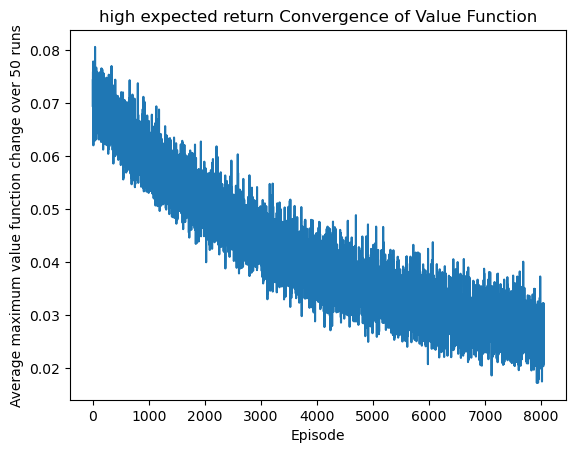

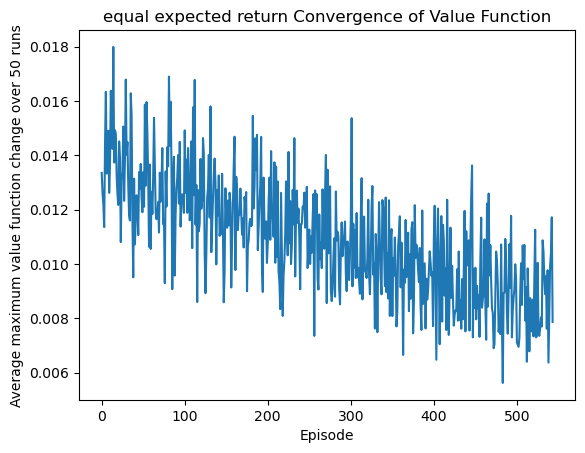

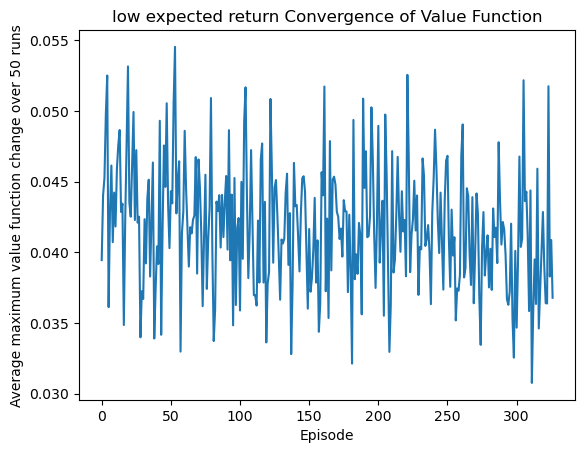

In [10]:
from more_itertools import chunked
for para in risky_return.keys():
    cvg_list = [sum(x) / len(x) for x in chunked(value_function_changes_list[para], 50)]
    plt.plot(cvg_list)
    plt.xlabel("Episode")
    plt.ylabel("Average maximum value function change over 50 runs")
    plt.title(f"{para} expected return Convergence of Value Function")
    plt.show()

In [ ]:
optimal_choice = []
benchmark1 = []
benchmark2 = []
benchmark3 = []
benchmark4 = []
opt_action_list = []

W0 = 1

for i in range(max_episodes):
  W_opt = W0
  W1 = W0
  W2 = W0
  W3 = W0
  W4 = W0
  for t in range(T):
    action_opt = optimal_policy((t, W_opt))
    action1 = 0.2
    action2 = 0.8
    action3 = 0.4
    action4 = 0.6
    if t <= 9:
      y = a if random.uniform(0, 1) < p else b
    if action_opt == "optimal_action":
      allocation = 1/(alpha*(a-b)*(1+r)**(T-t-1))*np.log(p*(a-r)/((1-p)*(r-b)))
    else:
      allocation = action_opt*W_opt

    W_opt = round(allocation * (y - r) + W_opt * (1 + r), 1)
    W1 = round(W1*action1 * (y - r) + W1 * (1 + r), 1)
    W2 = round(W2*action2 * (y - r) + W2 * (1 + r), 1)
    W3 = round(W3*action3 * (y - r) + W3 * (1 + r), 1)
    W4 = round(W4*action4 * (y - r) + W4 * (1 + r), 1)
  optimal_choice.append(W_opt)
  benchmark1.append(W1)
  benchmark2.append(W2)
  benchmark3.append(W3)
  benchmark4.append(W4)

  opt_action_list.append(action_opt)

KeyboardInterrupt: 

In [74]:
optimal_choice

[10.2,
 0.2,
 6.8,
 10.4,
 -1.9,
 5.3,
 6.8,
 11.8,
 3.3,
 11.3,
 -0.2,
 -0.1,
 3.5,
 10.4,
 10.4,
 -5.3,
 5.8,
 -1.9,
 5.8,
 -1.9,
 -0.4,
 3.3,
 5.5,
 3.5,
 -0.2,
 -0.2,
 -0.2,
 1.6,
 -1.9,
 -5.3,
 1.6,
 5.7,
 1.6,
 -5.3,
 -0.1,
 -3.4,
 1.6,
 -3.4,
 -1.9,
 1.6,
 10.4,
 10.6,
 -0.4,
 1.6,
 10.4,
 10.4,
 -0.1,
 3.0,
 -0.2,
 3.1,
 3.5,
 7.3,
 -0.1,
 -0.4,
 8.6,
 3.1,
 7.4,
 3.3,
 10.2,
 10.4,
 10.0,
 -1.6,
 -0.1,
 7.4,
 6.5,
 4.8,
 4.4,
 -0.1,
 12.3,
 9.7,
 -5.3,
 -1.9,
 -1.6,
 1.6,
 5.5,
 0.2,
 -3.4,
 6.5,
 6.5,
 -1.6,
 3.5,
 -3.4,
 8.6,
 -0.2,
 3.5,
 3.1,
 3.6,
 -3.4,
 -0.2,
 -0.2,
 6.1,
 -1.9,
 -5.3,
 6.5,
 10.2,
 -0.2,
 11.3,
 4.9,
 3.5,
 5.8,
 3.5,
 6.7,
 -5.3,
 5.8,
 -3.4,
 6.5,
 6.5,
 4.4,
 -5.3,
 3.1,
 1.6,
 3.0,
 4.6,
 3.3,
 -0.1,
 3.3,
 10.9,
 3.6,
 7.4,
 -0.2,
 -0.2,
 0.2,
 -5.3,
 11.8,
 -1.6,
 3.5,
 -5.3,
 4.4,
 3.3,
 10.2,
 -3.4,
 5.2,
 3.1,
 1.6,
 7.1,
 3.0,
 10.4,
 -0.2,
 10.2,
 -0.4,
 9.7,
 8.6,
 7.3,
 -0.2,
 1.6,
 4.6,
 7.4,
 -0.4,
 7.1,
 1.6,
 4.9,
 9.7,
 7.7,
 6.8,
 7.

In [36]:
np.mean(opt_action_list)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None

In [88]:
np.mean(optimal_choice)

3.7838173000000013

In [89]:
np.mean(benchmark1)

1.6001856999999997

In [90]:
np.mean(benchmark2)

1.2218057000000007

In [91]:
np.mean(benchmark3)


1.6001856999999997

In [92]:
np.mean(benchmark4)


1.4374652

In [93]:
np.mean(optimal_choice)

3.7838173000000013

In [83]:
alpha = 0.1
-np.exp(-alpha*np.mean(optimal_choice))/alpha

-6.843383704772335

In [94]:
alpha = 0.1
-np.exp(-alpha*np.mean(benchmark1))/alpha

-8.521279648029779

In [95]:
alpha = 0.1
-np.exp(-alpha*np.mean(benchmark2))/alpha

-8.849885516912215

In [96]:
-np.exp(-alpha*np.mean(benchmark3))/alpha

-8.521279648029779

In [97]:
-np.exp(-alpha*np.mean(benchmark4))/alpha

-8.66107261105491

END


In [ ]:
import unittest

class TestQLearning(unittest.TestCase):
    def test_utility_func(self):
        W = 1.0
        alpha = 0.1
        self.assertAlmostEqual(utility_func(10, W, alpha), -9.048374180359595)
        self.assertEqual(utility_func(5, W, alpha), 0) # When t < 10, utility_func = 0

    def test_find_max_qvalue(self):
        dummy_Q = {
            ((0, 1.0), 0.2): -0.5,
            ((0, 1.0), 0.4): -0.3,
            ((0, 1.0), 0.6): -0.1,
        }
        state = (0, 1.0)
        max_value = find_max_qvalue(dummy_Q, state, "value")
        self.assertAlmostEqual(max_value, -0.1)
        max_action = find_max_qvalue(dummy_Q, state, "action")
        self.assertEqual(max_action, 0.6)

    def test_optimal_policy(self):
        initial_state = (0, 1.0)
        optimal_action = optimal_policy(initial_state)
        self.assertIn(optimal_action, action_space)
        max_q_value = find_max_qvalue(Q, initial_state, "value")
        self.assertAlmostEqual(Q[(initial_state, optimal_action)], max_q_value)

    def test_q_learning_convergence(self):
        initial_state = (0, 1.0)
        initial_q_value = Q[(initial_state, 0.2)]
        Q[(initial_state, 0.2)] += 1e-6
        self.assertAlmostEqual(Q[(initial_state, 0.2)], initial_q_value, delta=1e-5)

# Create a test suite and run it
if __name__ == '__main__':
    suite = unittest.TestLoader().loadTestsFromTestCase(TestQLearning)
    unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK


# Q-value Iteration with Choice of Optimal policy

In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt

def utility_func(t, W, alpha=0.1):
  if t == 10:
    reward = -np.exp(-alpha*W)/alpha
  else:
    reward = 0
  return reward

# Problem parameters
T = 10  # Time horizon
a, b = 0.35, -0.2  # Returns of the risky asset for t <= 5
p = 0.5  # Probability of return a for t <= 5
mu, sigma = 0.15, 0.4  # Mean and standard deviation of the risky asset return for t > 5
alpha = 0.1 # Utility Parameter
r = 0.1 # Risk-free rate
gamma = 0.9  # Discounted factor
step_size = 0.01  # Learning rate
epsilon = 0.2  # Exploration rate
max_episodes = 1000000  # Maximum number of episodes
W0 = 1 # initial wealth


# State and action spaces
state_space = [(t, round(W, 1)) for t in range(T + 1) for W in np.arange(-50, 50, 0.1)]
action_space = [0.2, 0.4, 0.6, 0.8, "optimal_action"]

# Initialize Q-function
Q = {}
initial_value = -np.exp(-alpha*W0)/alpha
for state in state_space:
    for action in action_space:
        Q[(state, action)] = initial_value

def find_max_qvalue(qvalue_dict, state, status):

  max_value = -np.inf
  max_action = []
  for act in action_space:

    if qvalue_dict[(state, act)] > max_value:
      max_value = qvalue_dict[(state, act)]
      max_action = [act]

    elif qvalue_dict[(state, act)] == max_value:
      max_action.append(act)

  if status == "action":
    return max_action[np.random.choice(len(max_action))]
  else:
    return max_value


# Q learning
# In Colab, the code needs around 8 mins to run.
value_function_changes_opt = []
for episode in range(max_episodes):
  W = 1.0  # Initial wealth
  state = (0, W)
  max_value_change = 0
  for t in range(T+1):
    # Choose action
    if random.uniform(0, 1) < epsilon:
      action = random.choice(action_space)  # Explore
    else:
      action = find_max_qvalue(Q, state, "action")  # Exploit


    if action == "optimal_action":
      if 0 <= t <= 5:
        allocation = 1/(alpha*(a-b)*(1+r)**(T-t-1))*np.log(p*(a-r)/((1-p)*(r-b)))
      else:
        allocation = (mu-r)/(sigma**2*alpha*(1+r)**(T-t-1))
    else:
      allocation = action * W


    # Observe return of the risky asset
    if t <= 5:
      Y = a if random.uniform(0, 1) < p else b
    else:
      Y = np.random.normal(mu, sigma)


    if t < 10:
      # Calculate next wealth
      W_next = round(allocation * (Y - r) + W * (1 + r), 1)
      next_state = (t + 1, W_next)

      # Update Q-function
      reward = utility_func(t + 1, W_next)

      old_value = Q[(state, action)]

      Q[(state, action)] += step_size * (reward + gamma * find_max_qvalue(Q, state, "value") - Q[(state, action)])

      max_value_change = max(max_value_change, abs(Q[(state, action)] - old_value))

      # Update state and wealth
      state = next_state
      W = W_next

    else:
      reward = utility_func(t, W)
      Q[(state, action)] += step_size * (reward - Q[(state, action)])

value_function_changes_opt.append(max_value_change)

# Optimal policy
def optimal_policy(state):
  return find_max_qvalue(Q, state, "action")

# Example usage
initial_state = (0, 1.0)
print(f"Optimal action at the initial state {initial_state}: {optimal_policy(initial_state)}")

Optimal action at the initial state (0, 1.0): optimal_action


In [37]:
for state in state_space:
  print(f"Optimal action at the state {state}: {optimal_policy(state)}")

Optimal action at the state (0, -50.0): 0.6
Optimal action at the state (0, -49.9): 0.8
Optimal action at the state (0, -49.8): 0.6
Optimal action at the state (0, -49.7): 0.2
Optimal action at the state (0, -49.6): 0.8
Optimal action at the state (0, -49.5): optimal_action
Optimal action at the state (0, -49.4): optimal_action
Optimal action at the state (0, -49.3): 0.6
Optimal action at the state (0, -49.2): 0.2
Optimal action at the state (0, -49.1): 0.4
Optimal action at the state (0, -49.0): 0.2
Optimal action at the state (0, -48.9): optimal_action
Optimal action at the state (0, -48.8): 0.6
Optimal action at the state (0, -48.7): 0.4
Optimal action at the state (0, -48.6): optimal_action
Optimal action at the state (0, -48.5): optimal_action
Optimal action at the state (0, -48.4): 0.6
Optimal action at the state (0, -48.3): 0.2
Optimal action at the state (0, -48.2): 0.2
Optimal action at the state (0, -48.1): 0.4
Optimal action at the state (0, -48.0): optimal_action
Optimal ac

In [45]:
from more_itertools import chunked
cvg_list = [sum(x) / len(x) for x in chunked(value_function_changes_opt, 50)]
plt.plot(cvg_list)
plt.xlabel("Episode")
plt.ylabel("Average maximum value function change over 50 runs")
plt.title("Convergence of Value Function")
plt.show()

NameError: name 'value_function_changes_opt' is not defined

In [39]:
optimal_choice = []
benchmark1 = []
benchmark2 = []

for i in range(1000000):
  W_opt = W0
  W1 = W0
  W2 = W0
  for t in range(T):

    action_opt = optimal_policy((t, W_opt))
    action1 = 0.2
    action2 = 0.8
    if t <= 5:
      y = a if random.uniform(0, 1) < p else b
    else:
      y = np.random.normal(mu, sigma)

    if action_opt == "optimal_action":
      if 0 <= t <= 5:
        allocation = 1/(alpha*(a-b)*(1+r)**(T-t-1))*np.log(p*(a-r)/((1-p)*(r-b)))
      else:
        allocation = (mu-r)/(sigma**2*alpha*(1+r)**(T-t-1))
    else:
      allocation = action_opt * W_opt

    W_opt = round(allocation * (y - r) + W_opt * (1 + r), 1)
    W1 = round(W1 * action1 * (y - r) + W1 * (1 + r), 1)
    W2 = round(W2 * action2 * (y - r) + W2 * (1 + r), 1)
  optimal_choice.append(W_opt)
  benchmark1.append(W1)
  benchmark2.append(W2)


In [40]:
-np.exp(-alpha*np.mean(optimal_choice))/alpha

-7.424906136010021

In [41]:
-np.exp(-alpha*np.mean(benchmark1))/alpha

-7.673992028017233

In [42]:
-np.exp(-alpha*np.mean(benchmark2))/alpha

-7.585818922272785

In [43]:
np.mean(optimal_choice)

2.9774505000000016

In [44]:
np.mean(benchmark1)

2.6474814

In [45]:
np.mean(benchmark2)

2.7630452000000005

analytical


In [80]:
import math
a = 0.7
b = -0.3
p = 0.3
r = 0.05
alpha = 0.1
T = 10 # terminal time
t = 6 # current time
term1 = (a - r) / (a - b)
term2 = math.log((p * (a - r)) / ((1 - p) * (r - b)))
term3 = (b - r) / (a - b)
term4 = math.log((p * (a - r)) / ((1 - p) * (r - b)))

# Compute the final value of A
A = p * math.exp(-term1 * term2) + (1 - p) * math.exp(-term3 * term4)
theta = alpha*(1+r)**(T-t-1)
phi=(1/a)*(A)**(T-t)

x_t_opt = (1/(theta*(a-b)))*math.log((p*(a-r))/((1-p)*(r-b)))
x_t_opt_2 = 1/(alpha*(1+r)**(T-t-1)*(b-a))*math.log(((r-b)*(1-p))/(p*(a-r)))
print(x_t_opt)
print(x_t_opt_2)


-1.9717840577128185
-1.9717840577128183


In [ ]:

# Problem parameters
T = 10  # Time horizon
a, b = 0.2, -0.1  # Returns of the risky asset
p = 0.6  # Probability of return a at each time step
alpha = 0.1 # Utility Parameter

r = 0.05 # Risk-free rate
gamma = 0.9  # Discounted factor
step_size = 0.01  # Learning rate
epsilon = 0.4  # Exploration rate
max_episodes = 1000000  # Maximum number of episodes
W0 = 1 # initial wealth


In [7]:
import math
x_opt_list = []

# Parameters
a = 0.2
b = -0.1
p = 0.6
r = 0.05
alpha = 0.1
T = 10  # terminal time
t = 9   # current time

# Intermediate terms
term1 = (a - r) / (a - b)
term2 = math.log((p * (a - r)) / ((1 - p) * (r - b)))
term3 = (b - r) / (a - b)
term4 = math.log((p * (a - r)) / ((1 - p) * (r - b)))

# Compute the final value of A
A = p * math.exp(-term1 * term2) + (1 - p) * math.exp(-term3 * term4)
theta = alpha * (1 + r) ** (T - t - 1)
phi = (1 / a) * (A) ** (T - t)


# for t in range(0,10):# Parameters
#     theta = alpha * (1 + r) ** (T - t - 1)
#     x_t_opt = (1 / (theta * (a - b))) * math.log((p * (a - r)) / ((1 - p) * (r - b)))
#     x_opt_list.append(x_t_opt)



# Unconstrained optimal action
x_t_opt = (1 / (theta * (a - b))) * math.log((p * (a - r)) / ((1 - p) * (r - b)))
x_t_opt_2 = 1 / (alpha * (1 + r) ** (T - t - 1) * (b - a)) * math.log(((r - b) * (1 - p)) / (p * (a - r)))

# Constrain the action to [0, 1]
x_t_opt_constrained = max(0, min(1, x_t_opt))
x_t_opt_2_constrained = max(0, min(1, x_t_opt_2))

# Print results
print("Unconstrained x_t_opt:", x_t_opt)
print("Constrained x_t_opt:", x_t_opt_constrained)
print("Unconstrained x_t_opt_2:", x_t_opt_2)
print("Constrained x_t_opt_2:", x_t_opt_2_constrained)


Unconstrained x_t_opt: 13.515503603605472
Constrained x_t_opt: 1
Unconstrained x_t_opt_2: 13.515503603605474
Constrained x_t_opt_2: 1


In [11]:
import numpy as np
np.mean(x_opt_list)

1.123486881785863

In [84]:
import numpy as np

# Parameters
a = 0.7  # Risky asset return in the "up" state
b = -0.3  # Risky asset return in the "down" state
p = 0.5  # Probability of the "up" state
r = 0.05  # Risk-free rate
alpha = 0.1  # Risk aversion parameter for CARA utility
T = 10  # Terminal time (10 time steps: t = 0, 1, ..., 9)
gamma = 1  # Discount factor (set to 1 for finite-horizon problems)
learning_rate = 0.1  # Learning rate for TD updates

# Discretize state and action spaces
wealth_min = 0  # Minimum wealth
wealth_max = 100  # Maximum wealth
wealth_step = 1  # Discretization step for wealth
action_step = 0.1  # Discretization step for action

wealth_values = np.arange(wealth_min, wealth_max + wealth_step, wealth_step)
action_values = np.arange(0, 1 + action_step, action_step)

# Initialize Q-function
# Q[t, W_t, u_t] where t is the time step, W_t is wealth, and u_t is the action
Q = np.zeros((T, len(wealth_values), len(action_values)))

# TD Learning
num_episodes = 10000  # Number of episodes for training

for episode in range(num_episodes):
    W_t = wealth_min  # Initial wealth at t = 0
    for t in range(T):
        # Choose action (epsilon-greedy policy)
        if np.random.rand() < 0.1:  # Exploration
            u_t = np.random.choice(action_values)
        else:  # Exploitation
            u_t = action_values[np.argmax(Q[t, np.where(wealth_values == W_t)[0][0], :])]

        # Simulate next state
        Y_t = a if np.random.rand() < p else b  # Risky asset return
        W_t_plus_1 = W_t * (u_t * Y_t + (1 - u_t) * (1 + r))
        W_t_plus_1 = max(wealth_min, min(wealth_max, W_t_plus_1))  # Clip to bounds

        # Compute reward (utility of terminal wealth)
        if t == T - 1:  # Terminal time step
            reward = (1 - np.exp(-alpha * W_t_plus_1)) / alpha
        else:
            reward = 0  # No intermediate reward

        # TD update
        current_Q = Q[t, np.where(wealth_values == W_t)[0][0], np.where(action_values == u_t)[0][0]]
        if t < T - 1:  # Not at terminal time step
            next_max_Q = np.max(Q[t + 1, np.where(wealth_values == W_t_plus_1)[0][0], :])
        else:  # At terminal time step
            next_max_Q = 0  # No future reward
        Q[t, np.where(wealth_values == W_t)[0][0], np.where(action_values == u_t)[0][0]] += learning_rate * (
            reward + gamma * next_max_Q - current_Q
        )

        # Update state
        W_t = W_t_plus_1

# Derive optimal strategy
optimal_strategy = {}
for t in range(T):
    optimal_strategy[t] = {}
    for W_t in wealth_values:
        optimal_action = action_values[np.argmax(Q[t, np.where(wealth_values == W_t)[0][0], :])]
        optimal_strategy[t][W_t] = optimal_action

# Print optimal strategy
print("Optimal Strategy:")
for t in range(T):
    print(f"Time Step {t}:")
    for W_t, u_t in optimal_strategy[t].items():
        print(f"  Wealth {W_t}: Optimal Action {u_t}")

Optimal Strategy:
Time Step 0:
  Wealth 0: Optimal Action 0.0
  Wealth 1: Optimal Action 0.0
  Wealth 2: Optimal Action 0.0
  Wealth 3: Optimal Action 0.0
  Wealth 4: Optimal Action 0.0
  Wealth 5: Optimal Action 0.0
  Wealth 6: Optimal Action 0.0
  Wealth 7: Optimal Action 0.0
  Wealth 8: Optimal Action 0.0
  Wealth 9: Optimal Action 0.0
  Wealth 10: Optimal Action 0.0
  Wealth 11: Optimal Action 0.0
  Wealth 12: Optimal Action 0.0
  Wealth 13: Optimal Action 0.0
  Wealth 14: Optimal Action 0.0
  Wealth 15: Optimal Action 0.0
  Wealth 16: Optimal Action 0.0
  Wealth 17: Optimal Action 0.0
  Wealth 18: Optimal Action 0.0
  Wealth 19: Optimal Action 0.0
  Wealth 20: Optimal Action 0.0
  Wealth 21: Optimal Action 0.0
  Wealth 22: Optimal Action 0.0
  Wealth 23: Optimal Action 0.0
  Wealth 24: Optimal Action 0.0
  Wealth 25: Optimal Action 0.0
  Wealth 26: Optimal Action 0.0
  Wealth 27: Optimal Action 0.0
  Wealth 28: Optimal Action 0.0
  Wealth 29: Optimal Action 0.0
  Wealth 30: Optima

In [ ]:
from scipy.optimize import minimize

W_t = 1


# Define the negative of Q_t_star (to maximize)
def neg_Q_t_star(x_t, W_t, p, phi, theta, a, b, r):
    term1 = -p * phi * np.exp(-theta * (x_t * (a - r) + W_t * (1 + r)))
    term2 = -(1 - p) * phi * np.exp(-theta * (x_t * (b - r) + W_t * (1 + r)))
    return -(term1 + term2)  # Negative for maximization

# Initial guess for x_t
x_t_initial = 0.0

# Bounds for x_t
bounds = [(0, 1)]  # Example bounds


# Minimize the negative of Q_t_star
result = minimize(neg_Q_t_star, x_t_initial, args=(W_t, p, phi, theta, a, b, r), bounds=bounds)
optimal_x_t = result.x

In [42]:
optimal_x_t

array([1.])